# <p style="text-align: center;">Multi-Layer Perceptron (MLP) example in Keras <br> for house sales price prediction<br>using BOTH numerical and categorial features
</p>

<p style="text-align: center;">
 by Prof. Dr.-Ing. Jürgen Brauer, http://www.juergenbrauer.org
</p>

## Table of Contents

1. Read in the data and deal with "NaN" values
2. Prepare numerical features
3. Prepare categorial features
4. Combine numerical and categorial feature columns
5. Build and train MLP model
6. Testing the trained MLP
7. Predicting house prices for the Kaggle competition

## 1. Read in the data and deal with "NaN" values

In [3]:
import pandas as pd
train_data = pd.read_csv("kaggle_dataset_house_prices/train.csv")
test_data  = pd.read_csv("kaggle_dataset_house_prices/test.csv")

train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

## 2. Prepare numerical features

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True) # do not use scientific "e"-notation

# 1.
# prepare Pandas DataFrames only with numerical columns
train_data_num_only = train_data.select_dtypes(exclude=['object'])
test_data_num_only  = test_data.select_dtypes(exclude=['object'])

# 2.
# Throw away "Id" and SalePrice" column for training data
train_input_matrix = train_data_num_only.values[:,1:37]
train_output_matrix = train_data_num_only.values[:,37]
train_output_matrix = train_output_matrix.reshape(-1,1)

# 3.
# Throw away "Id" column for test input matrix
test_input_matrix  = test_data_num_only.values[:,1:]

# 4.
# create a MinMaxScaler with feature range [0,1]
# and use it to normalize the train_input_matrix
# Then use the SAME normalization to normalize test_data_matrix
scaler_input_features = MinMaxScaler(feature_range=(0, 1))
normalized_train_input_matrix_feats = scaler_input_features.fit_transform(train_input_matrix)
normalized_test_input_matrix_feats = scaler_input_features.transform(test_input_matrix)

# 5.
# Also create a MinMaxScaler for the train_output_matrix,
# which is essentially a column with the final SalePrice
scaler_saleprice = MinMaxScaler(feature_range=(0, 1))
normalized_train_output_matrix = scaler_saleprice.fit_transform(train_output_matrix)

## 3. Prepare categorial features

In [14]:
# 1.
# save the house Ids, since we need them later
# for our Kaggle submission
test_house_ids = test_data.values[:,0] # get the IDs from the original Pandas DataFrame


# 2.
# get Pandas data frames without the numerical features
gt_saleprice = train_data["SalePrice"]
train_data_cats_only = train_data.select_dtypes(exclude=['number'])
test_data_cats_only = test_data.select_dtypes(exclude=['number'])


# 3.
# map each single categorial column
# to multiple (one-hot encoded) columns
print(train_data_cats_only.dtypes)
frames = [train_data_cats_only, test_data_cats_only]
fused_df = pd.concat(frames)
print("Shape of fused_df is", fused_df.shape)

# now do the one-hot encoding
fused_df_hot_encoded = pd.get_dummies(fused_df)
print("Shape of fused_df_hot_encoded is", fused_df_hot_encoded.shape)

# now split the data frame into two data frames again
# with 1460 and 1459 rows
train_data_hot_encoded = fused_df_hot_encoded[0:1460]
test_data_hot_encoded  = fused_df_hot_encoded[1460:]


# 4.
# prepare NumPy matrices for training
# from Pandas DataFrames
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# define how NumPy shall print matrices
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True) # do not use scientific "e"-notation

# convert Pandas DataFrame to NumPy matrices
# since Keras will expect NumPy matrices
train_input_matrix_cat = train_data_hot_encoded.values
train_output_matrix    = gt_saleprice.values
train_output_matrix    = train_output_matrix.reshape(-1,1)
test_input_matrix_cat  = test_data_hot_encoded.values

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

C:\Users\Juergen Brauer\AppData\Local\conda\conda\envs\env_mss\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## 4. Combine numerical and categorial feature columns

We have now a training matrix with numerical features and a training matrix with categorial one-hot encoded features:

In [24]:
print("There are", normalized_train_input_matrix_feats.shape[1],
      "many numerical features that will be used.")
print("\tnormalized_train_input_matrix_feats has shape",
      normalized_train_input_matrix_feats.shape)
print("\tnormalized_test_input_matrix_feats has shape",
      normalized_test_input_matrix_feats.shape)

print("There are", train_input_matrix_cat.shape[1],
      "many categorial features that will be used.")
print("\ttrain_input_matrix_cat has shape",
      train_input_matrix_cat.shape)
print("\ttrain_input_matrix_cat has shape",
      train_input_matrix_cat.shape)

# concatenate the two input matrices horizontally
all_input_feats_train = np.hstack((normalized_train_input_matrix_feats,
                                   train_input_matrix_cat))
print("all_input_feats_train has shape", all_input_feats_train.shape)
all_input_feats_test = np.hstack((normalized_test_input_matrix_feats ,
                                   test_input_matrix_cat))
print("all_input_feats_test has shape", all_input_feats_test.shape)



There are 36 many numerical features that will be used.
	normalized_train_input_matrix_feats has shape (1460, 36)
	normalized_test_input_matrix_feats has shape (1459, 36)
There are 275 many categorial features that will be used.
	train_input_matrix_cat has shape (1460, 275)
	train_input_matrix_cat has shape (1460, 275)
all_input_feats_train has shape (1460, 311)
all_input_feats_test has shape (1459, 311)


## 5. Build and train MLP model

In [36]:
from keras.models import Sequential
from keras import layers
from keras.layers.core import Dense, Dropout
import pandas as pd
import numpy as np

model = Sequential()
model.add(Dense(160, activation="sigmoid"))
model.add(Dense(80, activation="sigmoid"))
model.add(Dense(1, activation="linear"))

model.compile(loss='mean_squared_error', optimizer='sgd')

X = all_input_feats_train
Y = normalized_train_output_matrix
print("Input X has shape", X.shape)
print("Desired output Y has shape", Y.shape)
print("Y:\n", Y)
model.fit(X,Y, validation_split=0.10, epochs=1000)

Input X has shape (1460, 311)
Desired output Y has shape (1460, 1)
Y:
 [[0.2411]
 [0.2036]
 [0.2619]
 ...
 [0.3216]
 [0.1489]
 [0.1564]]
Train on 1314 samples, validate on 146 samples
Epoch 1/1000
1314/1314 [==============================] - 0s 132us/step - loss: 0.0116 - val_loss: 0.0097
Epoch 2/1000
1314/1314 [==============================] - 0s 51us/step - loss: 0.0109 - val_loss: 0.0091
Epoch 3/1000
1314/1314 [==============================] - 0s 56us/step - loss: 0.0106 - val_loss: 0.0097
Epoch 4/1000
1314/1314 [==============================] - 0s 55us/step - loss: 0.0103 - val_loss: 0.0100
Epoch 5/1000
1314/1314 [==============================] - 0s 52us/step - loss: 0.0101 - val_loss: 0.0116
Epoch 6/1000
1314/1314 [==============================] - 0s 49us/step - loss: 0.0100 - val_loss: 0.0081
Epoch 7/1000
1314/1314 [==============================] - 0s 50us/step - loss: 0.0095 - val_loss: 0.0125
Epoch 8/1000
1314/1314 [==============================] - 0s 68us/step - loss: 0

1314/1314 [==============================] - 0s 50us/step - loss: 0.0044 - val_loss: 0.0032
Epoch 77/1000
1314/1314 [==============================] - 0s 49us/step - loss: 0.0044 - val_loss: 0.0032
Epoch 78/1000
1314/1314 [==============================] - 0s 73us/step - loss: 0.0044 - val_loss: 0.0032
Epoch 79/1000
1314/1314 [==============================] - 0s 52us/step - loss: 0.0043 - val_loss: 0.0032
Epoch 80/1000
1314/1314 [==============================] - 0s 51us/step - loss: 0.0044 - val_loss: 0.0034
Epoch 81/1000
1314/1314 [==============================] - 0s 52us/step - loss: 0.0043 - val_loss: 0.0034
Epoch 82/1000
1314/1314 [==============================] - 0s 54us/step - loss: 0.0043 - val_loss: 0.0068
Epoch 83/1000
1314/1314 [==============================] - 0s 51us/step - loss: 0.0044 - val_loss: 0.0034
Epoch 84/1000
1314/1314 [==============================] - 0s 50us/step - loss: 0.0043 - val_loss: 0.0047
Epoch 85/1000
1314/1314 [==============================] - 0

Epoch 153/1000
1314/1314 [==============================] - 0s 54us/step - loss: 0.0037 - val_loss: 0.0030
Epoch 154/1000
1314/1314 [==============================] - 0s 54us/step - loss: 0.0037 - val_loss: 0.0035
Epoch 155/1000
1314/1314 [==============================] - 0s 45us/step - loss: 0.0037 - val_loss: 0.0028
Epoch 156/1000
1314/1314 [==============================] - 0s 81us/step - loss: 0.0037 - val_loss: 0.0030
Epoch 157/1000
1314/1314 [==============================] - 0s 44us/step - loss: 0.0037 - val_loss: 0.0027
Epoch 158/1000
1314/1314 [==============================] - 0s 47us/step - loss: 0.0036 - val_loss: 0.0036
Epoch 159/1000
1314/1314 [==============================] - 0s 46us/step - loss: 0.0037 - val_loss: 0.0029
Epoch 160/1000
1314/1314 [==============================] - 0s 79us/step - loss: 0.0036 - val_loss: 0.0029
Epoch 161/1000
1314/1314 [==============================] - 0s 46us/step - loss: 0.0036 - val_loss: 0.0029
Epoch 162/1000
1314/1314 [===========

1314/1314 [==============================] - 0s 45us/step - loss: 0.0033 - val_loss: 0.0024
Epoch 230/1000
1314/1314 [==============================] - 0s 84us/step - loss: 0.0033 - val_loss: 0.0025
Epoch 231/1000
1314/1314 [==============================] - 0s 45us/step - loss: 0.0033 - val_loss: 0.0037
Epoch 232/1000
1314/1314 [==============================] - 0s 47us/step - loss: 0.0033 - val_loss: 0.0024
Epoch 233/1000
1314/1314 [==============================] - 0s 47us/step - loss: 0.0033 - val_loss: 0.0024
Epoch 234/1000
1314/1314 [==============================] - 0s 82us/step - loss: 0.0033 - val_loss: 0.0051
Epoch 235/1000
1314/1314 [==============================] - 0s 75us/step - loss: 0.0033 - val_loss: 0.0028
Epoch 236/1000
1314/1314 [==============================] - 0s 46us/step - loss: 0.0033 - val_loss: 0.0028
Epoch 237/1000
1314/1314 [==============================] - 0s 46us/step - loss: 0.0033 - val_loss: 0.0038
Epoch 238/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 61us/step - loss: 0.0030 - val_loss: 0.0025
Epoch 306/1000
1314/1314 [==============================] - 0s 100us/step - loss: 0.0030 - val_loss: 0.0025
Epoch 307/1000
1314/1314 [==============================] - 0s 66us/step - loss: 0.0031 - val_loss: 0.0022
Epoch 308/1000
1314/1314 [==============================] - 0s 59us/step - loss: 0.0030 - val_loss: 0.0023
Epoch 309/1000
1314/1314 [==============================] - 0s 46us/step - loss: 0.0031 - val_loss: 0.0023
Epoch 310/1000
1314/1314 [==============================] - 0s 47us/step - loss: 0.0030 - val_loss: 0.0022
Epoch 311/1000
1314/1314 [==============================] - 0s 59us/step - loss: 0.0030 - val_loss: 0.0023
Epoch 312/1000
1314/1314 [==============================] - 0s 83us/step - loss: 0.0030 - val_loss: 0.0023
Epoch 313/1000
1314/1314 [==============================] - 0s 65us/step - loss: 0.0030 - val_loss: 0.0036
Epoch 314/1000
1314/1314 [=========================

1314/1314 [==============================] - 0s 44us/step - loss: 0.0029 - val_loss: 0.0021
Epoch 382/1000
1314/1314 [==============================] - 0s 47us/step - loss: 0.0028 - val_loss: 0.0021
Epoch 383/1000
1314/1314 [==============================] - 0s 46us/step - loss: 0.0029 - val_loss: 0.0021
Epoch 384/1000
1314/1314 [==============================] - 0s 45us/step - loss: 0.0028 - val_loss: 0.0021
Epoch 385/1000
1314/1314 [==============================] - 0s 44us/step - loss: 0.0028 - val_loss: 0.0023
Epoch 386/1000
1314/1314 [==============================] - 0s 81us/step - loss: 0.0028 - val_loss: 0.0025
Epoch 387/1000
1314/1314 [==============================] - 0s 63us/step - loss: 0.0029 - val_loss: 0.0027
Epoch 388/1000
1314/1314 [==============================] - 0s 61us/step - loss: 0.0029 - val_loss: 0.0021
Epoch 389/1000
1314/1314 [==============================] - 0s 64us/step - loss: 0.0028 - val_loss: 0.0020
Epoch 390/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 51us/step - loss: 0.0027 - val_loss: 0.0019
Epoch 458/1000
1314/1314 [==============================] - 0s 65us/step - loss: 0.0027 - val_loss: 0.0019
Epoch 459/1000
1314/1314 [==============================] - 0s 46us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 460/1000
1314/1314 [==============================] - 0s 65us/step - loss: 0.0027 - val_loss: 0.0019
Epoch 461/1000
1314/1314 [==============================] - 0s 43us/step - loss: 0.0027 - val_loss: 0.0019
Epoch 462/1000
1314/1314 [==============================] - 0s 64us/step - loss: 0.0027 - val_loss: 0.0019
Epoch 463/1000
1314/1314 [==============================] - 0s 45us/step - loss: 0.0027 - val_loss: 0.0041
Epoch 464/1000
1314/1314 [==============================] - 0s 63us/step - loss: 0.0027 - val_loss: 0.0019
Epoch 465/1000
1314/1314 [==============================] - 0s 48us/step - loss: 0.0027 - val_loss: 0.0019
Epoch 466/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 46us/step - loss: 0.0026 - val_loss: 0.0021
Epoch 534/1000
1314/1314 [==============================] - 0s 62us/step - loss: 0.0025 - val_loss: 0.0018
Epoch 535/1000
1314/1314 [==============================] - 0s 41us/step - loss: 0.0025 - val_loss: 0.0020
Epoch 536/1000
1314/1314 [==============================] - 0s 65us/step - loss: 0.0025 - val_loss: 0.0018
Epoch 537/1000
1314/1314 [==============================] - 0s 47us/step - loss: 0.0025 - val_loss: 0.0019
Epoch 538/1000
1314/1314 [==============================] - 0s 47us/step - loss: 0.0025 - val_loss: 0.0018
Epoch 539/1000
1314/1314 [==============================] - 0s 45us/step - loss: 0.0025 - val_loss: 0.0018
Epoch 540/1000
1314/1314 [==============================] - 0s 68us/step - loss: 0.0025 - val_loss: 0.0019
Epoch 541/1000
1314/1314 [==============================] - 0s 54us/step - loss: 0.0025 - val_loss: 0.0020
Epoch 542/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 45us/step - loss: 0.0024 - val_loss: 0.0018
Epoch 610/1000
1314/1314 [==============================] - 0s 58us/step - loss: 0.0024 - val_loss: 0.0017
Epoch 611/1000
1314/1314 [==============================] - 0s 45us/step - loss: 0.0024 - val_loss: 0.0021
Epoch 612/1000
1314/1314 [==============================] - 0s 45us/step - loss: 0.0025 - val_loss: 0.0018
Epoch 613/1000
1314/1314 [==============================] - 0s 45us/step - loss: 0.0024 - val_loss: 0.0017
Epoch 614/1000
1314/1314 [==============================] - 0s 45us/step - loss: 0.0024 - val_loss: 0.0018
Epoch 615/1000
1314/1314 [==============================] - 0s 46us/step - loss: 0.0024 - val_loss: 0.0021
Epoch 616/1000
1314/1314 [==============================] - 0s 46us/step - loss: 0.0024 - val_loss: 0.0018
Epoch 617/1000
1314/1314 [==============================] - 0s 44us/step - loss: 0.0024 - val_loss: 0.0017
Epoch 618/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 81us/step - loss: 0.0023 - val_loss: 0.0053
Epoch 686/1000
1314/1314 [==============================] - 0s 62us/step - loss: 0.0024 - val_loss: 0.0024
Epoch 687/1000
1314/1314 [==============================] - 0s 45us/step - loss: 0.0024 - val_loss: 0.0019
Epoch 688/1000
1314/1314 [==============================] - 0s 46us/step - loss: 0.0023 - val_loss: 0.0017
Epoch 689/1000
1314/1314 [==============================] - 0s 45us/step - loss: 0.0024 - val_loss: 0.0020
Epoch 690/1000
1314/1314 [==============================] - 0s 45us/step - loss: 0.0023 - val_loss: 0.0020
Epoch 691/1000
1314/1314 [==============================] - 0s 44us/step - loss: 0.0023 - val_loss: 0.0016
Epoch 692/1000
1314/1314 [==============================] - 0s 60us/step - loss: 0.0023 - val_loss: 0.0017
Epoch 693/1000
1314/1314 [==============================] - 0s 46us/step - loss: 0.0023 - val_loss: 0.0041
Epoch 694/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 42us/step - loss: 0.0022 - val_loss: 0.0016
Epoch 762/1000
1314/1314 [==============================] - 0s 46us/step - loss: 0.0022 - val_loss: 0.0016
Epoch 763/1000
1314/1314 [==============================] - 0s 46us/step - loss: 0.0022 - val_loss: 0.0017
Epoch 764/1000
1314/1314 [==============================] - 0s 45us/step - loss: 0.0022 - val_loss: 0.0016
Epoch 765/1000
1314/1314 [==============================] - 0s 42us/step - loss: 0.0022 - val_loss: 0.0018
Epoch 766/1000
1314/1314 [==============================] - 0s 80us/step - loss: 0.0022 - val_loss: 0.0018
Epoch 767/1000
1314/1314 [==============================] - 0s 45us/step - loss: 0.0022 - val_loss: 0.0016
Epoch 768/1000
1314/1314 [==============================] - 0s 42us/step - loss: 0.0022 - val_loss: 0.0024
Epoch 769/1000
1314/1314 [==============================] - 0s 45us/step - loss: 0.0022 - val_loss: 0.0021
Epoch 770/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 44us/step - loss: 0.0021 - val_loss: 0.0015
Epoch 838/1000
1314/1314 [==============================] - 0s 76us/step - loss: 0.0022 - val_loss: 0.0015
Epoch 839/1000
1314/1314 [==============================] - 0s 47us/step - loss: 0.0021 - val_loss: 0.0016
Epoch 840/1000
1314/1314 [==============================] - 0s 63us/step - loss: 0.0022 - val_loss: 0.0018
Epoch 841/1000
1314/1314 [==============================] - 0s 42us/step - loss: 0.0022 - val_loss: 0.0017
Epoch 842/1000
1314/1314 [==============================] - 0s 44us/step - loss: 0.0022 - val_loss: 0.0016
Epoch 843/1000
1314/1314 [==============================] - 0s 46us/step - loss: 0.0021 - val_loss: 0.0015
Epoch 844/1000
1314/1314 [==============================] - 0s 64us/step - loss: 0.0022 - val_loss: 0.0015
Epoch 845/1000
1314/1314 [==============================] - 0s 64us/step - loss: 0.0021 - val_loss: 0.0016
Epoch 846/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 42us/step - loss: 0.0021 - val_loss: 0.0027
Epoch 914/1000
1314/1314 [==============================] - 0s 48us/step - loss: 0.0021 - val_loss: 0.0015
Epoch 915/1000
1314/1314 [==============================] - 0s 46us/step - loss: 0.0021 - val_loss: 0.0015
Epoch 916/1000
1314/1314 [==============================] - 0s 45us/step - loss: 0.0021 - val_loss: 0.0015
Epoch 917/1000
1314/1314 [==============================] - 0s 46us/step - loss: 0.0021 - val_loss: 0.0015
Epoch 918/1000
1314/1314 [==============================] - 0s 46us/step - loss: 0.0021 - val_loss: 0.0015
Epoch 919/1000
1314/1314 [==============================] - 0s 55us/step - loss: 0.0021 - val_loss: 0.0026
Epoch 920/1000
1314/1314 [==============================] - 0s 46us/step - loss: 0.0021 - val_loss: 0.0015
Epoch 921/1000
1314/1314 [==============================] - 0s 44us/step - loss: 0.0021 - val_loss: 0.0019
Epoch 922/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 49us/step - loss: 0.0020 - val_loss: 0.0014
Epoch 990/1000
1314/1314 [==============================] - 0s 50us/step - loss: 0.0020 - val_loss: 0.0014
Epoch 991/1000
1314/1314 [==============================] - 0s 55us/step - loss: 0.0020 - val_loss: 0.0015
Epoch 992/1000
1314/1314 [==============================] - 0s 62us/step - loss: 0.0020 - val_loss: 0.0061
Epoch 993/1000
1314/1314 [==============================] - 0s 49us/step - loss: 0.0021 - val_loss: 0.0015
Epoch 994/1000
1314/1314 [==============================] - 0s 53us/step - loss: 0.0020 - val_loss: 0.0015
Epoch 995/1000
1314/1314 [==============================] - 0s 52us/step - loss: 0.0020 - val_loss: 0.0015
Epoch 996/1000
1314/1314 [==============================] - 0s 51us/step - loss: 0.0020 - val_loss: 0.0014
Epoch 997/1000
1314/1314 [==============================] - 0s 51us/step - loss: 0.0020 - val_loss: 0.0017
Epoch 998/1000
1314/1314 [==========================

## 6. Testing the trained MLP

preds_train_houses:
 [[0.2472]
 [0.2091]
 [0.2825]
 ...
 [0.3184]
 [0.1648]
 [0.132 ]]
preds_train_houses_dollar:
 [[212888.98]
 [185458.47]
 [238297.39]
 ...
 [264196.7 ]
 [153559.45]
 [129933.85]]
Shape of preds_train_houses is (1460, 1)
Shape of preds_train_houses_dollar is (1460, 1)


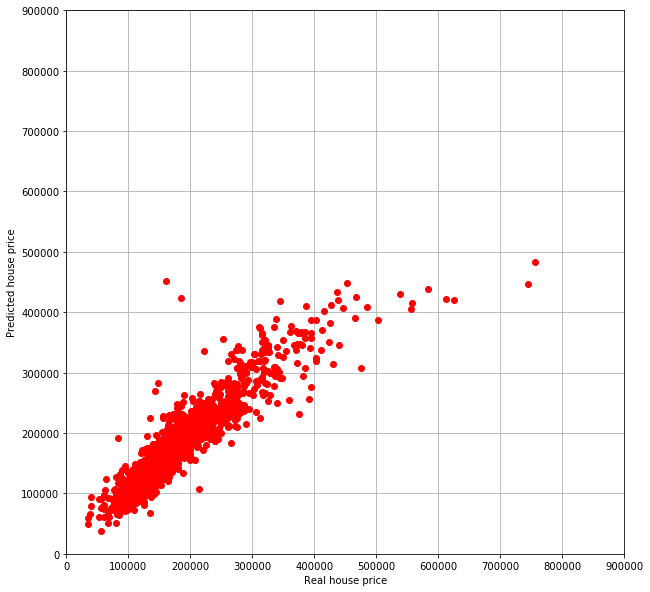

In [37]:
import matplotlib.pyplot as plt

preds_train_houses = model.predict(all_input_feats_train)
print("preds_train_houses:\n", preds_train_houses)
preds_train_houses_dollar = scaler_saleprice.inverse_transform(preds_train_houses)
print("preds_train_houses_dollar:\n", preds_train_houses_dollar)
print("Shape of preds_train_houses is", preds_train_houses.shape)
print("Shape of preds_train_houses_dollar is", preds_train_houses_dollar.shape)
plt.figure( figsize=(10,10) )
plt.plot(train_output_matrix, preds_train_houses_dollar, 'ro')
plt.xlabel('Real house price', fontsize = 10)
plt.ylabel('Predicted house price', fontsize = 10)
plt.grid(True)
plt.xlim(0,900000)
plt.ylim(0,900000)
plt.show()

## 7. Predicting house prices for the Kaggle competition

In [38]:
# PREDICT house prices for all the test houses!
preds_test_houses = model.predict(all_input_feats_test)
preds_test_houses_dollar = scaler_saleprice.inverse_transform(preds_test_houses)


# generate a Pandas dataframe
# from the NumPy prediction_matrix
preds_test_houses_dollar = preds_test_houses_dollar.reshape(-1)
print("test_house_ids has shape", test_house_ids.shape)
print("preds_test_houses_dollar has shape", preds_test_houses_dollar.shape)
predition_dataframe = pd.DataFrame({'Id'       :test_house_ids,
                                    'SalePrice':preds_test_houses_dollar}
                                  )

# convert column "Id" to int64 dtype
predition_dataframe = predition_dataframe.astype({"Id": int})
print(predition_dataframe)

# now save the Pandas dataframe to a .csv file
PREDICTION_FILENAME = "my_predicted_house_prices.csv"
predition_dataframe.to_csv(PREDICTION_FILENAME, sep=',', index=False)

test_house_ids has shape (1459,)
preds_test_houses_dollar has shape (1459,)
        Id      SalePrice
0     1461  119153.218750
1     1462  163085.281250
2     1463  186285.546875
3     1464  202216.406250
4     1465  171008.000000
5     1466  173684.140625
6     1467  150894.078125
7     1468  165523.984375
8     1469  191570.187500
9     1470  122980.726562
10    1471  183263.546875
11    1472   90185.289062
12    1473   82719.000000
13    1474  138065.375000
14    1475   76572.164062
15    1476  370694.062500
16    1477  233364.296875
17    1478  307669.187500
18    1479  340132.750000
19    1480  427137.250000
20    1481  313224.312500
21    1482  221117.359375
22    1483  167558.234375
23    1484  169760.875000
24    1485  200150.656250
25    1486  210681.375000
26    1487  351333.437500
27    1488  217339.781250
28    1489  201314.703125
29    1490  255553.140625
...    ...            ...
1429  2890   87928.656250
1430  2891  123197.570312
1431  2892   35114.812500
1432  2893   6